# TrOCR finetuning with our data

In [ ]:
import pandas as pd
import os
import PIL
from glob import glob

path = os.path.dirname(os.getcwd()) 

In [3]:
text_path = path+'/data/transcriptions'
file_list = glob(os.path.join(text_path, 'transcription_ex*.txt'))

df_list = []

for file in file_list:
    with open(file, 'r', encoding='utf-8') as f:
        content = f.read()
    lines = content.split('\n')

    df = pd.DataFrame({
        'line': range(0, len(lines)),  # Line numbers starting from 0
        'text': lines
    })
    
    name = os.path.basename(file)
    name = name.split('.')[0]
    df['file'] = name.split('ex')[1]
    df['file'] = df['file'].astype(int)
    df_list.append(df)
df = pd.concat(df_list, ignore_index=True)

In [4]:
df = df.sort_values(by=['file', 'line']).reset_index(drop=True)
df

,line,text,file
0,0,N' d'ordre\tDate du dépot des déclarations\t...,1
1,1,Nom. Prénoms Domiciles\tActif. (2)\tPassif. (2...,1
2,2,\tarrêté le vingt huit octobre 1919 servais\t\...,1
3,3,\tarrêté le vingt neuf octobre 1919 servais\t\...,1
4,4,398\ttrente octobre\tHerrent\tAlphones gh\tOph...,1
...,...,...,...
299,10,19 dix neuf d Pétriaux Coralie Nivelles 22 av...,20
300,11,19^2 d Dubois Alexandre Quenast 7b 1919 Dubois...,20
301,12,Arrêté le dix neuf février 1920 servais,20
302,13,Arrêté le vingt février 1920 servais,20


In [5]:
image_path = path + '/data/lines'
image_list = glob(os.path.join(image_path, '*.jpg'))
print(len(image_list))
df_images = pd.DataFrame({'file_name': image_list})
df_images['file_name'] = df_images['file_name'].apply(lambda x: os.path.basename(x))
name = df_images['file_name']
name = name.str.split('_').str[0]
df_images['file'] = name.str.split('example').str[1]
df_images['file'] = df_images['file'].astype(int)
line =  df_images['file_name'].str.split('_').str[1]
line = line.astype(str) 
df_images['line'] = line.str.split('.').str[0]
df_images['line'] = df_images['line'].astype(int)
df_images = df_images.sort_values(by=['file', 'line']).reset_index(drop=True)
df = df.merge(df_images, on = ['file', 'line'])

283


In [6]:
df

,line,text,file,file_name
0,0,N' d'ordre\tDate du dépot des déclarations\t...,1,example1_00.jpg
1,1,Nom. Prénoms Domiciles\tActif. (2)\tPassif. (2...,1,example1_01.jpg
2,2,\tarrêté le vingt huit octobre 1919 servais\t\...,1,example1_02.jpg
3,3,\tarrêté le vingt neuf octobre 1919 servais\t\...,1,example1_03.jpg
4,4,398\ttrente octobre\tHerrent\tAlphones gh\tOph...,1,example1_04.jpg
...,...,...,...,...
278,9,Arrêté le dix huit février 1920 servais,20,example20_09.jpg
279,10,19 dix neuf d Pétriaux Coralie Nivelles 22 av...,20,example20_10.jpg
280,11,19^2 d Dubois Alexandre Quenast 7b 1919 Dubois...,20,example20_11.jpg
281,12,Arrêté le dix neuf février 1920 servais,20,example20_12.jpg


In [7]:
# Let's disregard the header for now. 
df_noheader = df[df['line'] > 0].reset_index(drop=True)
df_noheader

,line,text,file,file_name
0,1,Nom. Prénoms Domiciles\tActif. (2)\tPassif. (2...,1,example1_01.jpg
1,2,\tarrêté le vingt huit octobre 1919 servais\t\...,1,example1_02.jpg
2,3,\tarrêté le vingt neuf octobre 1919 servais\t\...,1,example1_03.jpg
3,4,398\ttrente octobre\tHerrent\tAlphones gh\tOph...,1,example1_04.jpg
4,5,398^2\td\tLefévre\tJules\tBraine l'Alleud\t8 J...,1,example1_05.jpg
...,...,...,...,...
258,9,Arrêté le dix huit février 1920 servais,20,example20_09.jpg
259,10,19 dix neuf d Pétriaux Coralie Nivelles 22 av...,20,example20_10.jpg
260,11,19^2 d Dubois Alexandre Quenast 7b 1919 Dubois...,20,example20_11.jpg
261,12,Arrêté le dix neuf février 1920 servais,20,example20_12.jpg


In [7]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_noheader, test_size=0.8)
# we reset the indices to start from zero
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [44]:
train_df[['file', 'line']].sort_values(by=['file', 'line'])

,file,line
20,1,2
14,1,12
15,2,6
37,2,7
46,2,12
5,3,11
34,3,12
11,4,11
1,5,13
48,6,2


# Based on the [Tutorial](https://github.com/NielsRogge/Transformers-Tutorials/blob/master/TrOCR/Fine_tune_TrOCR_on_IAM_Handwriting_Database_using_native_PyTorch.ipynb)

In [ ]:
import torch
from torch.utils.data import Dataset
from PIL import Image

class IAMDataset(Dataset):
    def __init__(self, root_dir, df, processor, max_target_length=128):
        self.root_dir = root_dir
        self.df = df
        self.processor = processor
        self.max_target_length = max_target_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # get file name + text 
        file_name = self.df['file_name'][idx]
        text = self.df['text'][idx]
        # prepare image (i.e. resize + normalize)
        image = Image.open(self.root_dir + file_name).convert("RGB")
        pixel_values = self.processor(image, return_tensors="pt").pixel_values
        # add labels (input_ids) by encoding the text
        labels = self.processor.tokenizer(text, 
                                          padding="max_length", 
                                          max_length=self.max_target_length).input_ids
        labels = [label if label != self.processor.tokenizer.pad_token_id else -100 for label in labels]

        encoding = {"pixel_values": pixel_values.squeeze(), "labels": torch.tensor(labels)}
        return encoding

In [9]:
from transformers import TrOCRProcessor

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
train_dataset = IAMDataset(root_dir=path+'/data/lines/',
                           df=train_df,
                           processor=processor)
eval_dataset = IAMDataset(root_dir=path+'/data/lines/',
                           df=test_df,
                           processor=processor)

/opt/anaconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [10]:
print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(eval_dataset))

Number of training examples: 52
Number of validation examples: 210


In [11]:
encoding = train_dataset[0]
for k,v in encoding.items():
  print(k, v.shape)

pixel_values torch.Size([3, 384, 384])
labels torch.Size([128])


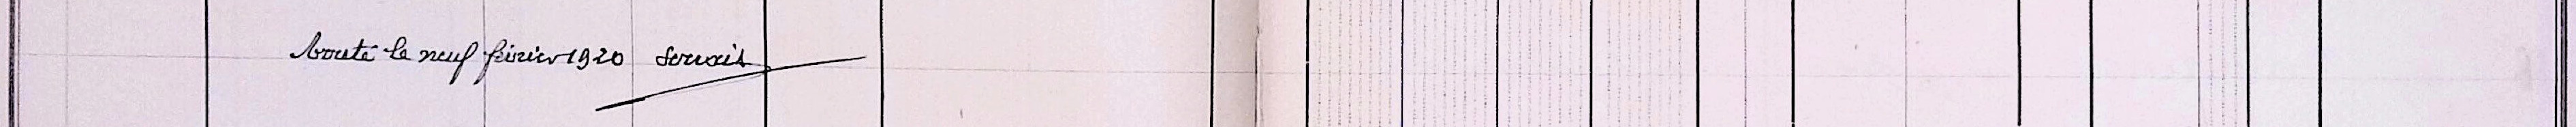

In [12]:
image = Image.open(train_dataset.root_dir + train_df['file_name'][0]).convert("RGB")
image

In [13]:
labels = encoding['labels']
labels[labels == -100] = processor.tokenizer.pad_token_id
label_str = processor.decode(labels, skip_special_tokens=True)
print(label_str)

 Arrêté le neuf février 1920 servais  


In [30]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
eval_dataloader = DataLoader(eval_dataset, batch_size=1) # Did the batch size as 1... 

# Train the data

In [15]:
from transformers import VisionEncoderDecoderModel
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-stage1")
model.to(device)

VisionEncoderDecoderModel has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-stage1 and are newly initialized: ['encod

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=False)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=False)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fea

In [16]:
# set special tokens used for creating the decoder_input_ids from the labels
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id
# make sure vocab size is set correctly
model.config.vocab_size = model.config.decoder.vocab_size

# set beam search parameters
model.config.eos_token_id = processor.tokenizer.sep_token_id
model.config.max_length = 200 # Change this when running it for whole scans. 
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
model.config.length_penalty = 2.0  # A value greater than 1.0 encourages longer sequences, while a value less than 1.0 would favor shorter ones.
model.config.num_beams = 4 # The number of beams (or different candidate sequences)

In [17]:
from evaluate import load

cer_metric =load("cer")

In [18]:
def compute_cer(pred_ids, label_ids):
    pred_str = processor.batch_decode(pred_ids, skip_special_tokens=True)
    label_ids[label_ids == -100] = processor.tokenizer.pad_token_id
    label_str = processor.batch_decode(label_ids, skip_special_tokens=True)

    cer = cer_metric.compute(predictions=pred_str, references=label_str)

    return cer
     

In [ ]:
from transformers import AdamW
from tqdm.notebook import tqdm

optimizer = AdamW(model.parameters(), lr=5e-5)

generated_texts = {}
for epoch in range(7):  # loop over the dataset multiple times
    # Train
    model.train()
    train_loss = 0.0
    for batch in tqdm(train_dataloader):
        # Move batch data to device
        for k, v in batch.items():
            batch[k] = v.to(device)

        # Forward pass + backward pass + optimize
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        train_loss += loss.item()

    print(f"Loss after epoch {epoch}:", train_loss / len(train_dataloader))
    
    # Evaluate
    model.eval()
    valid_cer = 0.0
    generated_texts['epoch_' + str(epoch)] = {}

    with torch.no_grad():
        for batch_idx, batch in enumerate(tqdm(eval_dataloader)):
            # Run batch generation
            outputs = model.generate(batch["pixel_values"].to(device))
            
            # Store generated text using batch index instead of the batch dictionary
            decoded_text = processor.batch_decode(outputs, skip_special_tokens=True)[0]
            generated_texts['epoch_' + str(epoch)][f'batch_{batch_idx}'] = decoded_text
            
            # Compute metrics
            cer = compute_cer(pred_ids=outputs, label_ids=batch["labels"])
            valid_cer += cer 

    print("Validation CER:", valid_cer / len(eval_dataloader))

# Save the trained model
model.save_pretrained(".")
     

/opt/anaconda3/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/13 [00:00<?, ?it/s]

Loss after epoch 0: 2.821434268584618


  0%|          | 0/210 [00:00<?, ?it/s]

Validation CER: 0.6686115598475921


  0%|          | 0/13 [00:00<?, ?it/s]

Loss after epoch 1: 2.17416826578287


  0%|          | 0/210 [00:00<?, ?it/s]

Validation CER: 0.6579479107815699


  0%|          | 0/13 [00:00<?, ?it/s]

Loss after epoch 2: 1.901102969279656


  0%|          | 0/210 [00:00<?, ?it/s]

Validation CER: 0.6881277702195343


  0%|          | 0/13 [00:00<?, ?it/s]

Loss after epoch 3: 1.609467359689566


  0%|          | 0/210 [00:00<?, ?it/s]

Validation CER: 0.6970462225671537


  0%|          | 0/13 [00:00<?, ?it/s]

Loss after epoch 4: 1.3910892009735107


  0%|          | 0/210 [00:00<?, ?it/s]

Validation CER: 0.6973012118353529


  0%|          | 0/13 [00:00<?, ?it/s]

Loss after epoch 5: 1.2574740739969106


  0%|          | 0/210 [00:00<?, ?it/s]

Validation CER: 0.670852796603021


  0%|          | 0/13 [00:00<?, ?it/s]

Loss after epoch 6: 1.0419947000650258


  0%|          | 0/210 [00:00<?, ?it/s]

Validation CER: 0.6690733652513408


In [39]:
generated_texts['epoch_6']['batch_140']

" 436 d Gaussin Eva Catherine Catherine Emma Braine l'alleud 22 avril 1919 Blalque & autres 1885 1885 17 Db 1919 non passible "

In [ ]:
# Save text to a file
            # if epoch == 4:
            #     find_filename = test_df['file_name'][batch_idx]
            #     output_path = os.path.join(output_folder, f"file{find_filename}_epoch_{epoch}_batch_{batch_idx}.txt")
            #     with open(output_path, "w") as f:
            #         f.write(generated_texts['epoch_' + str(epoch)][f'batch_{batch_idx}'])
    # Write all results for this epoch to disk in one go

output_folder = path + '/results/predictions/TrOCR/20_train'

epoch == 6
os.makedirs(f'{output_folder}/epoch{epoch}', exist_ok=True)
for key in generated_texts['epoch_' + str(epoch)].keys():
    find_filename = test_df['file_name'][int(key.split('_')[1])]
    output_path = os.path.join(output_folder, f'epoch{epoch}/{find_filename}_epoch_{epoch}_{key}.txt')
    with open(output_path, "w") as f:
        f.write(generated_texts['epoch_' + str(epoch)][key])